In [1]:
# building a neural network using Pytorch


In [2]:
import torch
#input x and output y
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]


In [3]:
#convert to float and tensor
x=torch.tensor(x).float()
y=torch.tensor(y).float()

In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [5]:
x=x.to(device)
y=y.to(device)

In [6]:
# define neural arch
import torch.nn as nn


In [7]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__() #to ensure class inherits nn.Module

        #define layers
        self.input_to_hidden=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output=nn.Linear(8,1)

    #connect the layers
    def forward(self,x):
        x=self.input_to_hidden(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output(x)
        return x


In [8]:
torch.manual_seed(42)
#let us inspect weights
#create instance of MyNeuralNet register it to device
mynet=MyNeuralNet().to(device)

In [9]:
mynet.input_to_hidden.weight

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)

In [10]:
#getting all params
mynet.parameters()

<generator object Module.parameters at 0x000002A2CCE77E60>

In [11]:
#looping generator object
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)
Parameter containing:
tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
       requires_grad=True)
Parameter containing:
tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]],
       requires_grad=True)
Parameter containing:
tensor([0.2730], requires_grad=True)


In [12]:
#You can also manually register these parameters
#using the nn.Parameter(<tensor>) function. Hence, the following code is equivalent to the neural network class that we defined previously.
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

In [13]:
#define loss function
loss_func=nn.MSELoss()

In [14]:
#calculating loss
output=mynet(x)
loss_value=loss_func(output,y)
print(loss_value)
#pred first than true value


tensor(168.3231, grad_fn=<MseLossBackward0>)


In [15]:
#define optimizers
#it takes model params and lr
#sgd
opt=torch.optim.SGD(mynet.parameters(),lr=0.01)


In [16]:
#perform all the steps to be done in an epoch together
# opt.zero_grad() #flush prev gradients
# loss_value=loss_func(mynet(x))
# loss_value.backward()
# opt.step()


In [17]:
loss_history=[]
for _ in range(500):
    opt.zero_grad()
    loss_value=loss_func(mynet(x),y)

    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

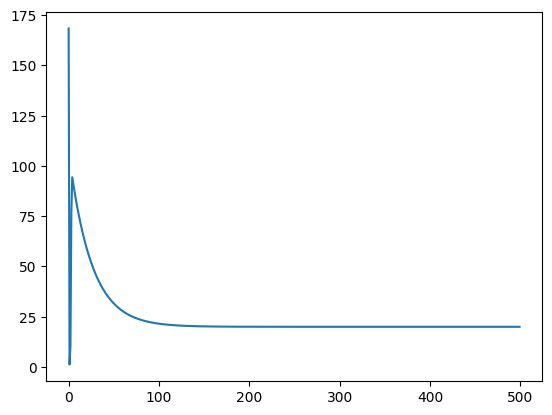

In [18]:
# plot loss value with increasing epoch
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [19]:
#Note that, as expected, the loss value decreases over increasing epochs


In [20]:
nn.Linear(in_features=10,out_features=12,bias=True)

Linear(in_features=10, out_features=12, bias=True)

In [21]:
#using all datapoints

In [22]:
x = torch.tensor([[1,2],[3,4],[5,6],[7,8]]).float()
y = torch.tensor([[3],[7],[11],[15]]).float()

In [23]:
from torch.utils.data import DataLoader

In [24]:
from dataset import MyDataset

ds=MyDataset(x,y)
dl=DataLoader(ds,batch_size=2,shuffle=True)



In [25]:
for a in dl:
    c,d=a
    print(c,d)

tensor([[3., 4.],
        [1., 2.]]) tensor([[7.],
        [3.]])
tensor([[5., 6.],
        [7., 8.]]) tensor([[11.],
        [15.]])


In [26]:
import torch.nn as nn

In [27]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__() #to ensure class inherits nn.Module

        #define layers
        self.input_to_hidden=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output=nn.Linear(8,1)

    #connect the layers
    def forward(self,x):
        x=self.input_to_hidden(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output(x)
        return x

In [28]:
import torch

In [29]:
mynet=MyNeuralNet().to(device='cpu')
loss_func=nn.MSELoss()
opt=torch.optim.SGD(mynet.parameters(),lr=0.01)

In [30]:
loss_history=[]
for e in range(500):
    for a,b in dl:
        
        opt.zero_grad()
        loss_val=loss_func(mynet(a),b)
        loss_val.backward()
        opt.step()
        loss_history.append(loss_val.item())
        



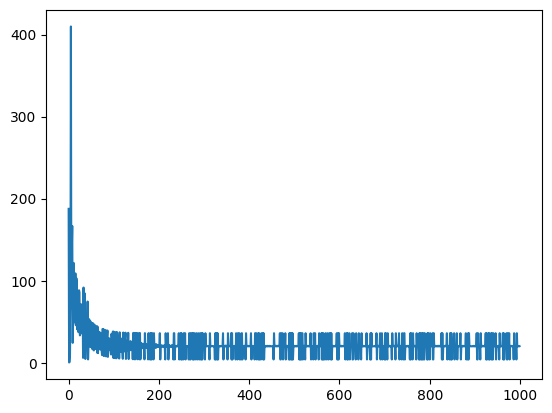

In [31]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [32]:
# predicting on new data points
val_x=[[10,11]]

In [33]:
mynet(torch.tensor(val_x).float())

tensor([[9.0041]], grad_fn=<AddmmBackward0>)

In [34]:
mynet.state_dict()

OrderedDict([('input_to_hidden.weight',
              tensor([[-0.3912, -0.3579],
                      [-0.6285, -0.3928],
                      [-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [-1.0336, -1.1534],
                      [-0.6657,  0.1642],
                      [-0.6586, -1.2196],
                      [-0.7868, -0.2530]])),
             ('input_to_hidden.bias',
              tensor([ 0.3716,  0.0715, -0.1243, -0.1872, -0.3393, -0.1249, -0.5346,  0.3650])),
             ('hidden_to_output.weight',
              tensor([[ 0.3038, -1.4672, -0.0792,  0.0052, -2.9225,  0.0850, -1.8540,  0.0967]])),
             ('hidden_to_output.bias', tensor([9.0041]))])

In [35]:
torch.save(mynet.state_dict(),'mynet.pth')

In [ ]:
#implementing a new loss
